<a href="https://colab.research.google.com/github/shruthad/Medical-Image-segmentation/blob/main/MEDICAL_IMAGE_SEGMENTATION(unet).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

In [ ]:
X_train= []
Y_train=[]

X_test=[]
Y_test=[]
for k in range(84):
  
  
    X_train.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/train_{k+1}.bmp'))
    Y_train.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/train_{k+1}_anno.bmp'))
for i in range(21,59):
  
    X_train.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{i+1}.bmp'))
    Y_train.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{i+1}_anno.bmp'))

In [ ]:

for k in range(20):
  
    X_test.append(cv2.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{k+1}.bmp'))
    Y_test.append(plt.imread(f'/content/drive/MyDrive/warwick/Warwick QU Dataset (Released 2016_07_08)/testA_{k+1}_anno.bmp'))

In [ ]:
len(X_test)

20

In [ ]:
import numpy
for i in range(20):
  print(numpy.unique(Y_test[i]))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2]
[0 1 2 3]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
[0 1 2 3 4]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6]
[0 1 2 3 4 5]
[0 1 2 3 4 5 6 7]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
[0 1 2 3 4 5]


In [ ]:
X_train[0].shape

(522, 775, 3)

In [ ]:
import cv2
im_size=512
in_size=768

inp=[]

for img in X_train:
   new_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
   #b,g,r = cv2.split(new_image)
   #gray = 0.2125*r + 0.7154*g + 0.0721*b
   smoothed = cv2.GaussianBlur(new_image, (9, 9), cv2.BORDER_DEFAULT) 
   unsharped = cv2.addWeighted(new_image, 1.5, smoothed, -0.5, 0)
   image = cv2.resize(unsharped, (in_size,im_size))
   inp.append(image)
   

In [ ]:
import cv2
im_size=512
in_size=768

out=[]

for img in Y_train:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   #imgUMat = np.float32(bw)
   #backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   out.append(new_image)

In [ ]:
for i in range(122):
  for j in out[i]:
     for n,k in enumerate(j):
       if k>0:
         j[n]=255;
       else:
         j[n]=0;

In [ ]:
out[1].shape

(512, 768)

In [ ]:
import numpy as np
Out=[]
for img in out:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   imgUMat = np.float32(img)
   backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   #new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   Out.append(backtorgb)

In [ ]:
Out[1].shape

(512, 768, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


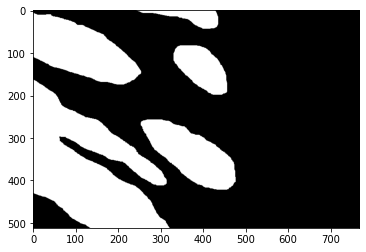

In [ ]:
plt.imshow(Out[1])

In [ ]:
len(Out)

122

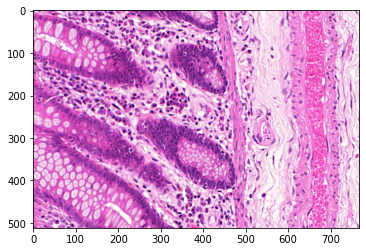

In [ ]:
plt.imshow(inp[1])

In [ ]:
import cv2
im_size=512
in_size=768

testin=[]

for img in X_test:
   new_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
   Smoothed = cv2.GaussianBlur(new_image, (9, 9), cv2.BORDER_DEFAULT) 
   Unsharped = cv2.addWeighted(new_image, 1.5, Smoothed, -0.5, 0)
   #b,g,r = cv2.split(new_image)
   
   image = cv2.resize(Unsharped, (in_size,im_size))
   testin.append(image)

In [ ]:

import cv2
im_size=512
in_size=768

testout=[]

for img in Y_test:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   #imgUMat = np.float32(bw)
   #backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   testout.append(new_image)

In [ ]:
for i in range(20):
  for j in testout[i]:
     for n,k in enumerate(j):
       if k>0:
         j[n]=255;
       else:
         j[n]=0;

In [ ]:
import numpy as np
testOut=[]
for img in testout:
   #retval,bw=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   imgUMat = np.float32(img)
   backtorgb=cv2.cvtColor(imgUMat,cv2.COLOR_GRAY2RGB)
   #new_image = cv2.resize(img,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   testOut.append(backtorgb)

In [ ]:
#dont run
import cv2
im_size=512
in_size=768

testout=[]

for img in Y_test:
   retuval,BW=cv2.threshold(img,1,255,cv2.THRESH_BINARY)
   
   ImgUMat = np.float32(BW)
   Backtorgb=cv2.cvtColor(ImgUMat,cv2.COLOR_GRAY2RGB)
   
   new_image = cv2.resize(Backtorgb,(in_size,im_size), interpolation =cv2.INTER_NEAREST)
   
   testout.append(new_image)

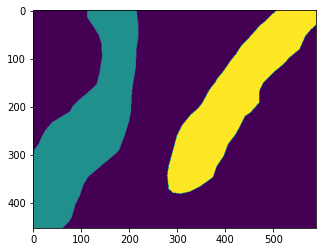

In [ ]:
plt.imshow(Y_test[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


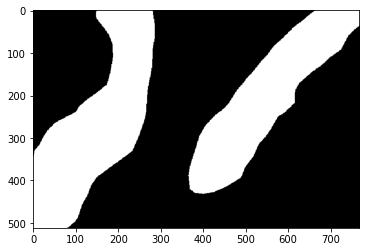

In [ ]:
plt.imshow(testOut[1])

array([[1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       [1, 1, 1, ..., 7, 7, 7],
       ...,
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7],
       [0, 0, 0, ..., 7, 7, 7]], dtype=uint8)

In [ ]:
testOut[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,  

In [ ]:
imagepatches=[]
for i,imag in enumerate(inp):
  
  ti_1=imag[0:256,0:256]
  imagepatches.append(ti_1)

  ti_2=imag[0:256,256:512]
  imagepatches.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  imagepatches.append(ti_3)

  ti_4=imag[256:512,0:256]
  imagepatches.append(ti_4)

  ti_5=imag[256:512,256:512]
  imagepatches.append(ti_5)

  ti_6=imag[256:512,512:768]
  imagepatches.append(ti_6)

In [ ]:
maskpatches=[]
for j,msk in enumerate(Out):
  
  tj_1=msk[0:256,0:256]
  maskpatches.append(tj_1)

  tj_2=msk[0:256,256:512]
  maskpatches.append(tj_2)
  
  tj_3=msk[0:256,512:768]
  maskpatches.append(tj_3)

  tj_4=msk[256:512,0:256]
  maskpatches.append(tj_4)

  tj_5=msk[256:512,256:512]
  maskpatches.append(tj_5)

  tj_6=msk[256:512,512:768]
  maskpatches.append(tj_6)

In [ ]:
len(imagepatches)

732

In [ ]:
import numpy
x_train =numpy.array(imagepatches)
y_train=numpy.array(maskpatches)

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.metrics import *
from keras import backend as K
import sklearn
from sklearn.model_selection import KFold


TensorFlow 1.x selected.


Using TensorFlow backend.


In [ ]:
def unet(shape = (None,None,3)):
    
    # Left side of the U-Net
    inputs = Input(shape)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv1)
    conv1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # Bottom of the U-Net
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = Dropout(0.5)(conv5)
    
    # Upsampling Starts, right side of the U-Net
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv6)
    conv6 = BatchNormalization()(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv7)
    conv7 = BatchNormalization()(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv8)
    conv8 = BatchNormalization()(conv8)
    
    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv9)
    conv9 = Conv2D(16, 3, activation = 'relu', padding = 'same', kernel_initializer = 'random_normal')(conv9)
    conv9 = BatchNormalization()(conv9)

    # Output layer of the U-Net with a softmax activation
    conv10 = Conv2D(2, 1, activation = 'sigmoid')(conv9)
    model = Model(input = inputs, output = conv10)
    def recall_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
      recall = true_positives / (possible_positives + K.epsilon())
      return recall

    def precision_m(y_true, y_pred):
      true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
      predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
      precision = true_positives / (predicted_positives + K.epsilon())
      return precision

    def f1_m(y_true, y_pred):
      precision = precision_m(y_true, y_pred)
      recall = recall_m(y_true, y_pred)
      return 2*((precision*recall)/(precision+recall+K.epsilon()))

    def iou(y_true, y_pred, smooth = 100):
      intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
      sum_ = K.sum(K.square(y_true), axis = -1) + K.sum(K.square(y_pred), axis=-1)
      jac = (intersection + smooth) / (sum_ - intersection + smooth)
      return jac

    def dice_coef(y_true, y_pred, smooth = 100):
      y_true_f = K.flatten(y_true)
      y_pred_f = K.flatten(y_pred)
      intersection = K.sum(y_true_f * y_pred_f)
      return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

    model.compile(optimizer = Adam(lr = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy',precision_m, recall_m,f1_m,iou,dice_coef])
    model.summary()
    
    return model


color_dict = {0: (0., 0., 0.),          
              1: (255., 255., 255.)}         


def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def conv_to_onehot():
    trainy_hot = []
    for i in range(y_train.shape[0]):
        hot_img = rgb_to_onehot(y_train[i], color_dict)
        trainy_hot.append(hot_img)
    trainy_hot = np.asarray(trainy_hot)
    return trainy_hot

trainyhot = conv_to_onehot()

model = unet()
n_folds=5
kfold = KFold(n_folds, shuffle=True, random_state=1)
for train_ix, test_ix in kfold.split(x_train):
   x_Train, y_Train, x_Test, y_Test = x_train[train_ix], trainyhot[train_ix], x_train[test_ix], trainyhot[test_ix]
   history = model.fit(x_Train, y_Train, epochs= 40, batch_size=16, validation_data=(x_Test, y_Test), verbose=1)
   acc = model.evaluate(x_Test, y_Test, verbose=1)
   #print('> %.3f' % (acc * 100.0))
model.save("/content/drive/MyDrive/unetkfold.h5")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, None, None, 6 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, None, None, 6 36928       conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, None, None, 6 256         conv2d_26[0][0]                  
____________________________________________________________________________________________

In [ ]:
trainyhot.shape


(732, 256, 256, 2)

In [ ]:
y_train.shape

(732, 256, 256, 3)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, None, None, 6 1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_26 (Conv2D)              (None, None, None, 6 36928       conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_10 (BatchNo (None, None, None, 6 256         conv2d_26[0][0]                  
____________________________________________________________________________________________

In [ ]:
test=[]
for i,imag in enumerate(testin):
  
  ti_1=imag[0:256,0:256]
  test.append(ti_1)

  ti_2=imag[0:256,256:512]
  test.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  test.append(ti_3)

  ti_4=imag[256:512,0:256]
  test.append(ti_4)

  ti_5=imag[256:512,256:512]
  test.append(ti_5)

  ti_6=imag[256:512,512:768]
  test.append(ti_6)

In [ ]:
testm=[]
for i,imag in enumerate(testOut):
  
  ti_1=imag[0:256,0:256]
  testm.append(ti_1)

  ti_2=imag[0:256,256:512]
  testm.append(ti_2)
  
  ti_3=imag[0:256,512:768]
  testm.append(ti_3)

  ti_4=imag[256:512,0:256]
  testm.append(ti_4)

  ti_5=imag[256:512,256:512]
  testm.append(ti_5)

  ti_6=imag[256:512,512:768]
  testm.append(ti_6)

In [ ]:
color_dict = {0: (0, 0, 0),          
              1: (255., 255., 255.)}   
def rgb_to_onehot(rgb_arr, color_dict):
    num_classes = len(color_dict)
    shape = rgb_arr.shape[:2]+(num_classes,)
    arr = np.zeros( shape, dtype=np.int8 )
    for i, cls in enumerate(color_dict):
        arr[:,:,i] = np.all(rgb_arr.reshape( (-1,3) ) == color_dict[i], axis=1).reshape(shape[:2])
    return arr

def onehot_to_rgb(onehot, color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in color_dict.keys():
        output[single_layer==k] = color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def conv_to_onehot():
    testy_hot = []
    for i in range(y_test.shape[0]):
        hot_img = rgb_to_onehot(y_test[i], color_dict)
        testy_hot.append(hot_img)
    testy_hot = np.asarray(testy_hot)
    return testy_hot

In [ ]:
import numpy
x_test =numpy.array(test)
y_test=numpy.array(testm)

In [ ]:
testhot = conv_to_onehot()

In [ ]:
acc=model.evaluate(x_test,testhot,verbose=1)


120/120 [==============================] - 3s 27ms/step


In [ ]:
acc

[0.35193112095197043,
 0.9073594212532043,
 0.9067092537879944,
 0.9067324995994568,
 0.906720757484436,
 0.9984912872314453,
 0.8992599248886108]

In [ ]:
y_pred=[]
y_pred=model.predict(x_test)

In [ ]:
len(y_pred)

120

In [ ]:
y_pred[0].shape

(256, 256, 2)

In [ ]:
Color_dict = {0: (0, 0, 0),          
              1: (255., 255., 255.)} 
def onehot_to_rgb(onehot, Color_dict):
    single_layer = np.argmax(onehot, axis=-1)
    output = np.zeros( onehot.shape[:2]+(3,) )
    for k in Color_dict.keys():
        output[single_layer==k] = Color_dict[k]
    return np.uint8(output)

#Function to convert trainy and testy to one hot encoded format
def onehot_to_conv():
    out = []
    for i in range(y_pred.shape[0]):
        hot_img = onehot_to_rgb(y_pred[i], Color_dict)
        out.append(hot_img)
    out = np.asarray(out)
    return out

In [ ]:
output=onehot_to_conv()

In [ ]:
len(output)

120

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


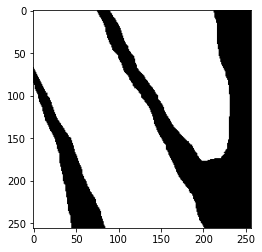

In [ ]:
plt.imshow(testm[34])


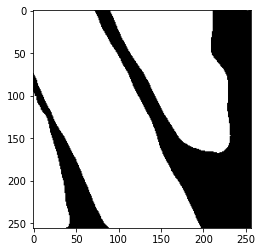

In [ ]:
plt.imshow(output[34])

In [ ]:
print(numpy.unique(output[54]))

[  0 255]


<Figure size 432x288 with 0 Axes>

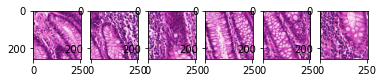

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=30

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(test[k+0])
axarr[1].imshow(test[k+1])
axarr[2].imshow(test[k+2])
axarr[3].imshow(test[k+3])
axarr[4].imshow(test[k+4])
axarr[5].imshow(test[k+5])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

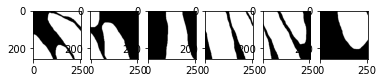

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=30

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(testm[k+0])
axarr[1].imshow(testm[k+1])
axarr[2].imshow(testm[k+2])
axarr[3].imshow(testm[k+3])
axarr[4].imshow(testm[k+4])
axarr[5].imshow(testm[k+5])

<Figure size 432x288 with 0 Axes>

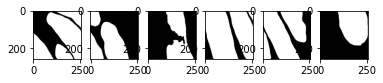

In [ ]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,6) 
k=30
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(output[k+0])
axarr[1].imshow(output[k+1])
axarr[2].imshow(output[k+2])
axarr[3].imshow(output[k+3])
axarr[4].imshow(output[k+4])
axarr[5].imshow(output[k+5])

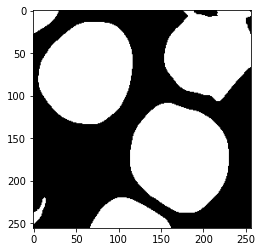

In [ ]:
plt.imshow(output[54])

In [ ]:
for i in range(59):
  print(numpy.unique(output[i]))

[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[255]
[  0 255]
[  0 255]
[255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]


In [ ]:
finallist[1].shape

(512, 768)

In [ ]:
finallist[1]

array([[255, 255, 255, ..., 253, 253, 253],
       [255, 255, 255, ..., 253, 253, 253],
       [255, 255, 255, ..., 253, 253, 253],
       ...,
       [255, 255, 255, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)